<br><br>
<font size='6'><b>Classification_project </b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data_Load" data-toc-modified-id="Data_Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data_Load</a></span></li><li><span><a href="#Data_NaN-values-check" data-toc-modified-id="Data_NaN-values-check-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data_NaN values check</a></span></li><li><span><a href="#Data_Labeling" data-toc-modified-id="Data_Labeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data_Labeling</a></span></li><li><span><a href="#Data_Combined" data-toc-modified-id="Data_Combined-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data_Combined</a></span></li><li><span><a href="#Meanfreq" data-toc-modified-id="Meanfreq-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Meanfreq</a></span></li><li><span><a href="#kurt" data-toc-modified-id="kurt-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>kurt</a></span></li><li><span><a href="#Remove-Outlier" data-toc-modified-id="Remove-Outlier-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Remove Outlier</a></span></li><li><span><a href="#Normalization" data-toc-modified-id="Normalization-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Normalization</a></span></li><li><span><a href="#Results-:--Remove-Outliers" data-toc-modified-id="Results-:--Remove-Outliers-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Results :  Remove Outliers</a></span></li><li><span><a href="#Perceptron" data-toc-modified-id="Perceptron-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Perceptron</a></span></li><li><span><a href="#SVM(Support-Vector-Machine)" data-toc-modified-id="SVM(Support-Vector-Machine)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>SVM(Support Vector Machine)</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Results-:-Perceptron-vs-SVM-vs-Logistic-Regression" data-toc-modified-id="Results-:-Perceptron-vs-SVM-vs-Logistic-Regression-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Results : Perceptron vs SVM vs Logistic Regression</a></span></li><li><span><a href="#SVM(Support-Vector-Machine)-:-Optimal-hyperparameters" data-toc-modified-id="SVM(Support-Vector-Machine)-:-Optimal-hyperparameters-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>SVM(Support Vector Machine) : Optimal hyperparameters</a></span></li></ul></div>

# Settings

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Data

## Data_Load

- Pandas를 사용하여 voice_ver2.csv 데이터 파일 load
- Load한 파일 프린트하기

In [3]:
voice_csv = pd.read_csv('./data_files/voice_ver2.csv')
voice_csv.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data_NaN values check

- 위에서 읽은 csv 파일에서 null값의 유무 확인하기 (Hint : Pandas의 ```isna``` 사용)

In [4]:
voice_csv.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Data_Labeling

- 다음 항목들 프린트하기

In [5]:
# 내가 한 방법
print("Total number of labels: {}".format(len(voice_csv['label'])))
print("Number of male: {}".format(len(voice_csv[voice_csv['label'].isin(['male'])])))
print("Number of female: {}".format(len(voice_csv[voice_csv['label'].isin(['female'])])))

# voice_csv[voice_csv['label'] == 'male']['label'].count()

Total number of labels: 160
Number of male: 80
Number of female: 80


In [6]:
# 조교님
print("Total number of labels: {}".format(voice_csv.shape[0]))
print("Number of male: {}".format(voice_csv[voice_csv['label'] == 'male'].shape[0]))
print("Number of female: {}".format(voice_csv[voice_csv['label'] == 'female'].shape[0]))

Total number of labels: 160
Number of male: 80
Number of female: 80


- Voice label을 male을 1, 그리고 female을 0으로 변환 (Hint : Pandas의 ```Categorical``` 사용)

In [12]:
# 다른 사람이 한 방법
df = pd.DataFrame(voice_csv)
voice_label = df['label'].map({'male':1,'female':0})
voice_label = np.asarray(voice_label).reshape(-1,1)

In [13]:
# 내가 한 방법
#voice_label = voice_csv['label'].astype('category').cat.codes
voice_label = pd.Categorical(voice_csv['label']).codes
print(voice_label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
# 조교님
voice_label = pd.Categorical(voice_csv.label, categories=['female','male']).codes # 순서 설정가능
print(voice_label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
voice_label = voice_label.reshape(-1,1)

- **Male : 1, Female : 0**

In [15]:
voice_label

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
    

## Data_Combined

- 변환한 array를 DataFrame 형태로 변환 후 기존의 DataFrame에 concatenate (Hint : Pandas의 ```concat``` 사용)

In [94]:
type(voice_label) # numpy 형태의 구조를 dataFrame형태로 변경 해야함

numpy.ndarray

In [95]:
type(voice_csv)

pandas.core.frame.DataFrame

In [16]:
pd_num_label = pd.DataFrame(voice_label, columns=['numerical_label'])

In [17]:
voice_csv.shape # shape을 확인 후 합치기

(160, 21)

In [10]:
pd_num_label.shape

(160, 1)

In [18]:
pd_voice_feature = pd.concat([voice_csv, pd_num_label], axis = 1) # axis =1 column으로추가하기, 0이면 row로 추가하기

- **Final data form**

In [19]:
pd_voice_feature

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,numerical_label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.109148,0.091542,0.071577,0.024263,0.195321,0.171057,1.899222,6.472859,0.948618,0.678843,...,0.190846,0.030189,0.275862,0.359375,0.007812,0.718750,0.710938,0.354396,female,0
156,0.158417,0.081200,0.187643,0.085523,0.219079,0.133556,1.817030,7.238168,0.955927,0.698466,...,0.192754,0.062500,0.262295,0.359063,0.031250,0.921875,0.890625,0.315027,female,0
157,0.116002,0.088799,0.121542,0.023682,0.193980,0.170299,2.193672,8.404158,0.943584,0.676598,...,0.184000,0.086486,0.258065,0.338170,0.007812,0.710938,0.703125,0.403419,female,0
158,0.097733,0.080078,0.065308,0.032779,0.159893,0.127113,1.272920,3.865641,0.957693,0.715485,...,0.178400,0.021680,0.253968,0.525608,0.007812,4.257812,4.250000,0.178741,female,0


- **Shape Check**

In [12]:
pd_voice_feature.shape

(160, 22)

# Data Exploration & Visualization

- **meanfreq(Std 0.03) vs kurt(Std 100) 시각화 및 Outlier 확인**
<br>
    - 정상 Case(meanfreq) vs 비정상 Case(kurt) 비교 분석

In [7]:
import seaborn as sns

In [20]:
pd_voice_feature.describe()
# kurt에 Outlier가 있는 것처럼 보임

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,numerical_label
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,...,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.00000
mean,0.161935,0.070997,0.161434,0.115098,0.219965,0.104866,2.865968,28.879883,0.928948,0.564458,...,0.161935,0.141252,0.025248,0.253990,0.505623,0.028662,3.020508,2.991846,0.207933,0.50000
std,0.029566,0.011849,0.042431,0.050383,0.026302,0.040586,3.236689,98.895625,0.030130,0.145481,...,0.029566,0.037592,0.020132,0.028888,0.366337,0.041039,2.279610,2.276682,0.101545,0.50157
min,0.059781,0.036543,0.032027,0.008701,0.090193,0.035785,0.141735,2.068455,0.846389,0.169242,...,0.059781,0.055565,0.015640,0.117647,0.007812,0.007812,0.007812,0.000000,0.000000,0.00000
25%,0.143414,0.064473,0.137353,0.082039,0.209451,0.064589,1.600196,5.672939,0.907541,0.449460,...,0.143414,0.106285,0.016125,0.250000,0.242415,0.007812,0.730469,0.703125,0.124868,0.00000
50%,0.166923,0.071983,0.162532,0.117773,0.224505,0.113332,2.078021,8.392857,0.933053,0.568473,...,0.166923,0.142279,0.017260,0.262295,0.393424,0.007812,2.820312,2.812500,0.204122,0.50000
75%,0.185609,0.079885,0.198937,0.158224,0.237257,0.126197,2.988381,15.759551,0.953392,0.690522,...,0.185609,0.175433,0.024778,0.275862,0.707960,0.031250,4.980469,4.972656,0.278276,1.00000
max,0.209933,0.091723,0.232552,0.197406,0.256527,0.186555,30.757155,1024.927705,0.978482,0.842936,...,0.209933,0.214127,0.168421,0.275862,2.253551,0.218750,7.000000,6.992188,0.505974,1.00000


## Meanfreq

/home/piai/anaconda3/envs/abc/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


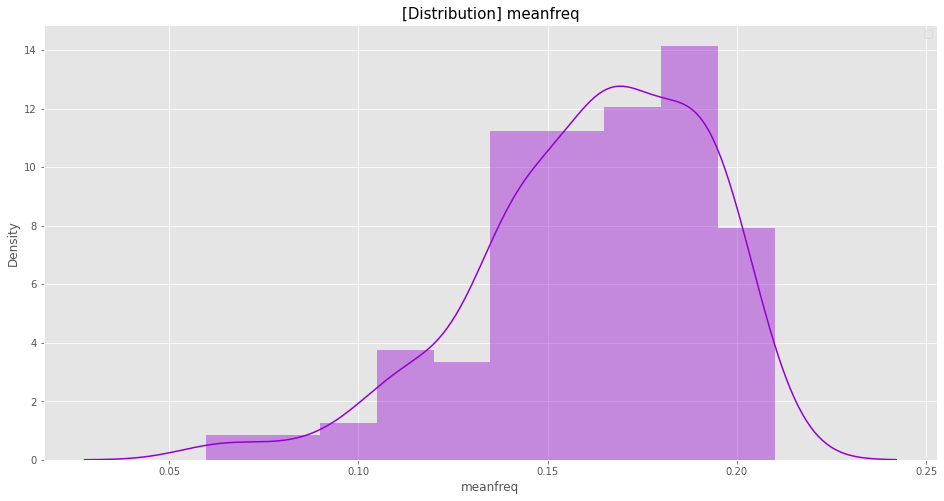

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("[Distribution] meanfreq", fontsize = 15)
sns.distplot(pd_voice_feature['meanfreq'] , color="darkviolet") # seaborn : plot library
plt.legend()

- Male과 Female 분포 plot, 서로 다른 색깔, 각 분포 라벨링

/home/piai/anaconda3/envs/abc/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/piai/anaconda3/envs/abc/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


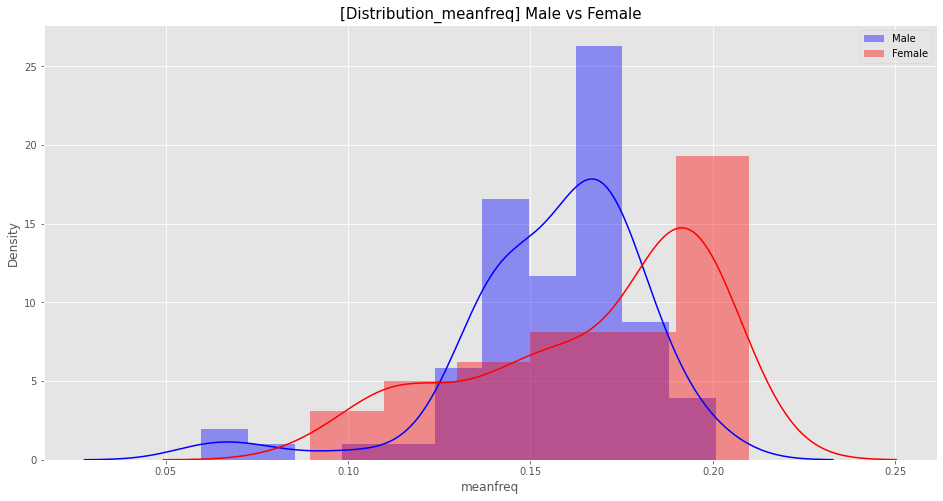

In [22]:
# 내가 쓴 답
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("[Distribution_meanfreq] Male vs Female", fontsize = 15)

sns.distplot(pd_voice_feature['meanfreq'][pd_voice_feature['numerical_label']==1], color="blue", label='Male')
sns.distplot(pd_voice_feature['meanfreq'][pd_voice_feature['numerical_label']==0], color="red", label='Female')

plt.legend()

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


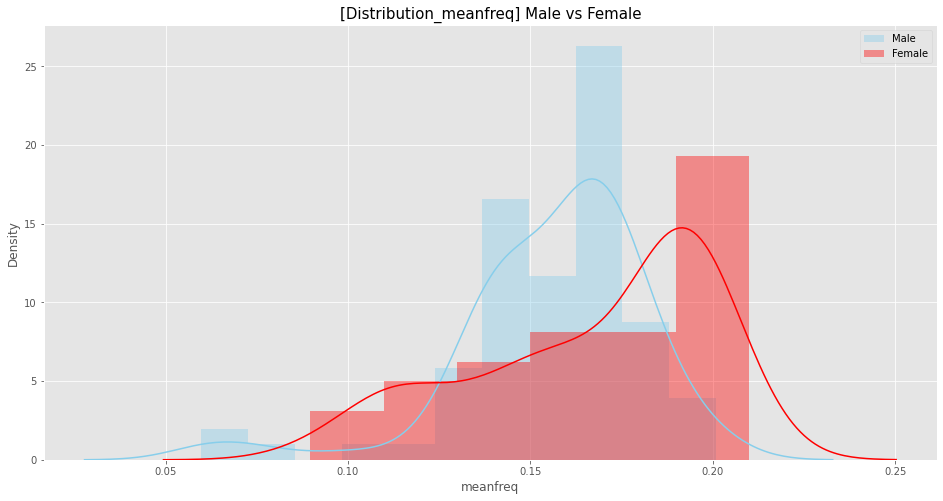

In [139]:
# 조교님
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("[Distribution_meanfreq] Male vs Female", fontsize = 15)

sns.distplot(pd_voice_feature['meanfreq'][pd_voice_feature['numerical_label']==1], color="skyblue", label='Male')
sns.distplot(pd_voice_feature['meanfreq'][pd_voice_feature['numerical_label']==0], color="red", label='Female')

plt.legend()

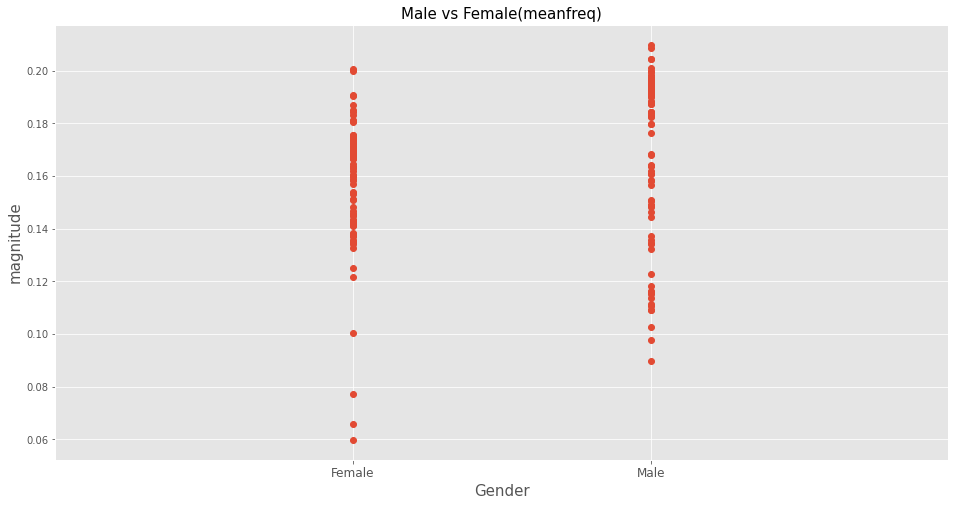

In [23]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("Male vs Female(meanfreq)", fontsize = 15)
plt.plot(pd_voice_feature['label'], pd_voice_feature['meanfreq'], 'o')
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("magnitude", fontsize = 15)
plt.xticks([0,1], ['Female', 'Male'],fontsize=12)
plt.xlim([-1, 2])
plt.show()

## kurt

/home/piai/anaconda3/envs/abc/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


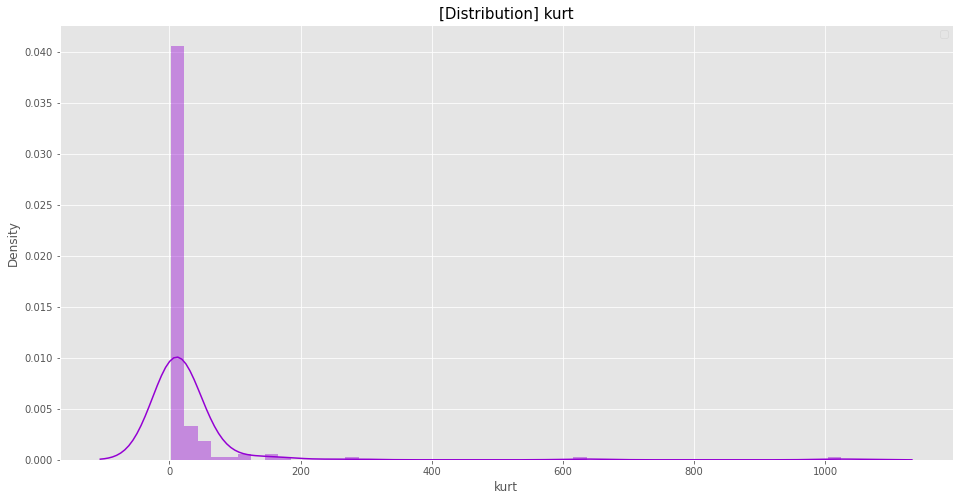

In [24]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("[Distribution] kurt", fontsize = 15)
sns.distplot(pd_voice_feature['kurt'] , color="darkviolet")
#sns.distplot(pd_voice_feature['meanfreq'][pd_voice_feature['label']==0] , color="red", label="Female")
plt.legend()

/home/piai/anaconda3/envs/abc/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/piai/anaconda3/envs/abc/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


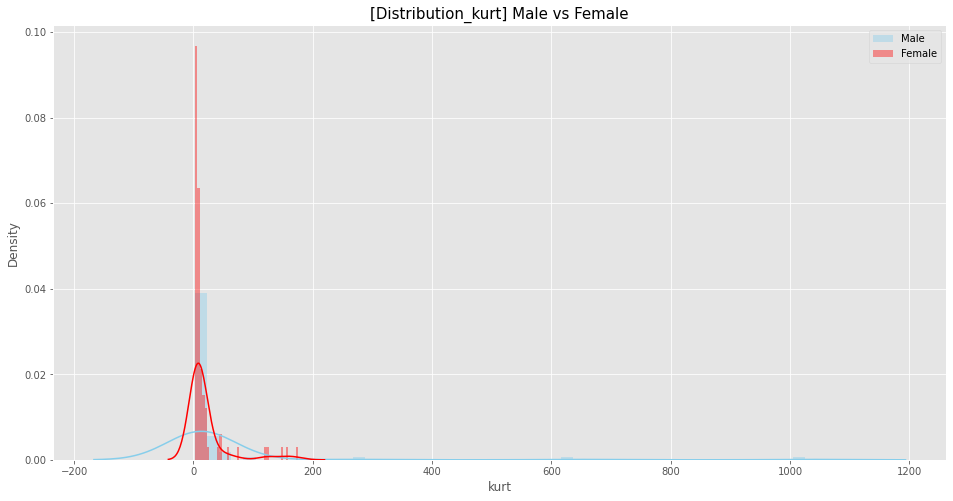

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("[Distribution_kurt] Male vs Female", fontsize = 15)
sns.distplot( pd_voice_feature['kurt'][pd_voice_feature['numerical_label']==1] , color="skyblue", label="Male")
sns.distplot( pd_voice_feature['kurt'][pd_voice_feature['numerical_label']==0] , color="red", label="Female")
plt.legend()

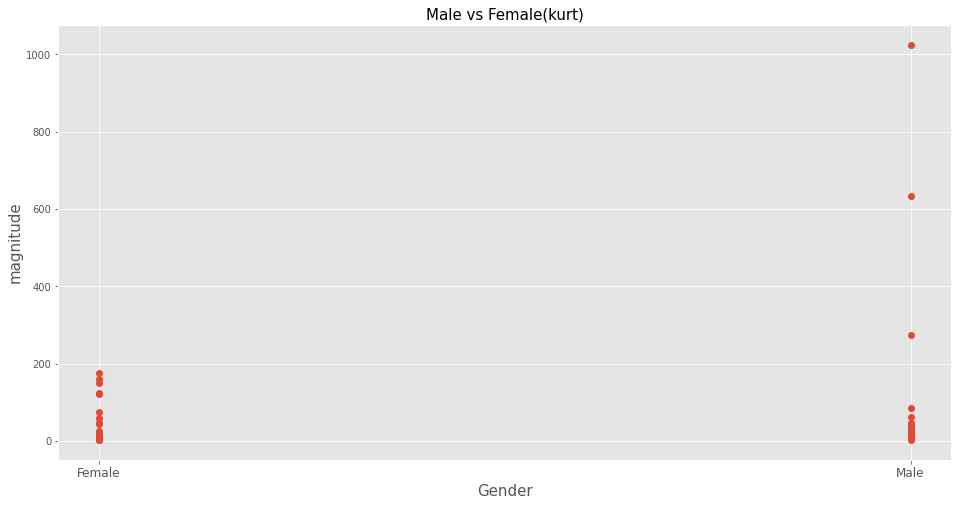

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("Male vs Female(kurt)", fontsize = 15)
plt.plot(pd_voice_feature['numerical_label'], pd_voice_feature['kurt'], 'o')
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("magnitude", fontsize = 15)
plt.xticks([0,1], ['Female', 'Male'],fontsize=12)
plt.show()

# Data Preprocessing

**- Outlier 제거**
<br>
**- Normalization**

## Remove Outlier

- **제거해야할 Outlier** 값이 200이 넘는 kurt samples 모두 제거
- 해당 조건에 부합하는 samples 먼저 확인

In [27]:
# 내가 쓴 답
del_idx = pd_voice_feature[pd_voice_feature['kurt'] > 200].index
RemoveOutlier_voice = pd_voice_feature.drop(del_idx)

In [36]:
# 조교님
RemoveOutlier_voice = pd_voice_feature[pd_voice_feature['kurt']<=200]

In [37]:
RemoveOutlier_voice

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,numerical_label
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,1
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male,1
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male,1
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.109148,0.091542,0.071577,0.024263,0.195321,0.171057,1.899222,6.472859,0.948618,0.678843,...,0.190846,0.030189,0.275862,0.359375,0.007812,0.718750,0.710938,0.354396,female,0
156,0.158417,0.081200,0.187643,0.085523,0.219079,0.133556,1.817030,7.238168,0.955927,0.698466,...,0.192754,0.062500,0.262295,0.359063,0.031250,0.921875,0.890625,0.315027,female,0
157,0.116002,0.088799,0.121542,0.023682,0.193980,0.170299,2.193672,8.404158,0.943584,0.676598,...,0.184000,0.086486,0.258065,0.338170,0.007812,0.710938,0.703125,0.403419,female,0
158,0.097733,0.080078,0.065308,0.032779,0.159893,0.127113,1.272920,3.865641,0.957693,0.715485,...,0.178400,0.021680,0.253968,0.525608,0.007812,4.257812,4.250000,0.178741,female,0


- **Check**

In [22]:
RemoveOutlier_voice.shape

(157, 22)

## Normalization

- **min/max scaler**
    - min : 0, max : 1

In [ ]:
'''
최소값을 0 으로 최대값을 1로 정규화
0 < (X - Xmin)/(Xmax - Xmin) <1

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
'''

In [29]:
from sklearn.preprocessing import minmax_scale

- RemoveOutlier_voice_x: 기존의 feature x값 지정
- RemoveOutlier_voice_y: 기존의 label 값 지정

In [34]:
RemoveOutlier_voice.columns[:-2]

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [40]:
'''
여러가지 접근 방법
RemoveOutlier_voice_x = RemoveOutlier_voice[RemoveOutlier_voice.columns[:-2]]
RemoveOutlier_voice_x = RemoveOutlier_voice.drop(columns=['label','numerical_label'])
'''

RemoveOutlier_voice_x = RemoveOutlier_voice.drop(['label','numerical_label'], axis =1)

RemoveOutlier_voice_y = RemoveOutlier_voice['numerical_label']

In [61]:
x_MinMax_scaled = minmax_scale(RemoveOutlier_voice_x)

In [63]:
x_MinMax_scaled

array([[0.51176776, 0.64457477, 0.5591517 , ..., 0.04519119, 0.06681767,
        0.46553659],
       [0.37780428, 0.77207654, 0.36188504, ..., 0.77520278, 0.78029445,
        0.385332  ],
       [0.35839319, 0.77952068, 0.32896456, ..., 0.36616454, 0.38052095,
        0.213724  ],
       ...,
       [0.21880036, 0.94702076, 0.34346869, ..., 0.06720742, 0.08833522,
        0.7882524 ],
       [0.06685954, 0.78896386, 0.01089178, ..., 0.59327926, 0.60249151,
        0.32435544],
       [0.36885987, 1.        , 0.39768438, ..., 0.12050985, 0.13816535,
        0.58062765]])

- **기존의 Voice features name/index 사용하며 normalize한 값을 pandas 데이터 형태로 재구성**

In [65]:
pre_voice_feature = pd.DataFrame(x_MinMax_scaled, index=RemoveOutlier_voice.index, columns=RemoveOutlier_voice.columns[:-2])

- **Check**
    - Normalization 확인
    - std 확인 (Remove outlier 확인)

In [66]:
pre_voice_feature

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
3,0.511768,0.644575,0.559152,0.445169,0.621304,0.501349,0.108644,0.012146,0.879080,0.828254,0.311840,0.511768,0.210640,0.014120,0.836538,0.064667,0.000000,0.045191,0.066818,0.465537
4,0.377804,0.772077,0.361885,0.346878,0.606410,0.607147,0.095535,0.013047,0.947939,0.911877,0.387620,0.377804,0.320584,0.008450,0.941880,0.297726,0.000000,0.775203,0.780294,0.385332
5,0.358393,0.779521,0.328965,0.287654,0.634062,0.702052,0.178319,0.035941,0.877955,0.844694,0.418455,0.358393,0.344134,0.009635,0.861620,0.108755,0.000000,0.366165,0.380521,0.213724
6,0.507894,0.687210,0.571543,0.424903,0.603861,0.510938,0.138299,0.022571,0.912986,0.880809,0.320460,0.507894,0.317725,0.069310,0.941880,0.191436,0.000000,0.749710,0.755379,0.211313
7,0.588999,0.728959,0.478279,0.521938,0.808475,0.568048,0.125007,0.015540,0.846632,0.817309,0.477079,0.588999,0.236419,0.013862,0.167475,0.110176,0.000000,0.041715,0.063420,0.541555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.161803,0.996718,0.047967,0.047205,0.522796,0.897207,0.174999,0.025367,0.761785,0.756429,0.076675,0.161803,0.853173,0.095224,1.000000,0.136629,0.000000,0.068366,0.089468,0.687033
156,0.571558,0.809294,0.734399,0.384314,0.708036,0.648480,0.166815,0.029775,0.820088,0.785556,0.737539,0.571558,0.865206,0.306712,0.914250,0.136486,0.111111,0.098494,0.115515,0.605747
157,0.218800,0.947021,0.343469,0.044003,0.512344,0.892175,0.204319,0.036490,0.721634,0.753096,0.027190,0.218800,0.809999,0.463712,0.887510,0.126963,0.000000,0.067207,0.088335,0.788252
158,0.066860,0.788964,0.010892,0.094067,0.246577,0.605746,0.112636,0.010351,0.834180,0.810818,0.097679,0.066860,0.774678,0.039533,0.861620,0.212398,0.000000,0.593279,0.602492,0.324355


In [67]:
pre_voice_feature.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.615791,0.624122,0.593532,0.557655,0.732078,0.460007,0.234828,0.086651,0.612763,0.588615,0.453239,0.615791,0.545733,0.064074,0.860348,0.207620,0.100731,0.418249,0.428346,0.391527
std,0.222529,0.215703,0.231185,0.268923,0.163297,0.270605,0.156292,0.155715,0.234436,0.217511,0.277842,0.222529,0.235984,0.132748,0.183777,0.165561,0.195929,0.335636,0.327676,0.205433
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458793,0.506443,0.453716,0.381770,0.644054,0.185050,0.145164,0.020748,0.452446,0.413660,0.186503,0.458793,0.339011,0.003306,0.836538,0.084995,0.000000,0.071842,0.088335,0.217536
50%,0.645717,0.642988,0.590487,0.574424,0.753056,0.514606,0.191240,0.035941,0.645671,0.596936,0.450885,0.645717,0.556589,0.010723,0.914250,0.156966,0.000000,0.403244,0.416761,0.380257
75%,0.810433,0.784292,0.802616,0.785320,0.850088,0.600862,0.277682,0.074348,0.810389,0.781396,0.719649,0.810433,0.760890,0.060753,1.000000,0.297726,0.111111,0.702202,0.708947,0.532288
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Results :  Remove Outliers

In [68]:
pd_pre_voice_data = pd.concat([pre_voice_feature,RemoveOutlier_voice_y], axis=1)

In [69]:
pd_pre_voice_data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,numerical_label
3,0.511768,0.644575,0.559152,0.445169,0.621304,0.501349,0.108644,0.012146,0.879080,0.828254,...,0.511768,0.210640,0.014120,0.836538,0.064667,0.000000,0.045191,0.066818,0.465537,1
4,0.377804,0.772077,0.361885,0.346878,0.606410,0.607147,0.095535,0.013047,0.947939,0.911877,...,0.377804,0.320584,0.008450,0.941880,0.297726,0.000000,0.775203,0.780294,0.385332,1
5,0.358393,0.779521,0.328965,0.287654,0.634062,0.702052,0.178319,0.035941,0.877955,0.844694,...,0.358393,0.344134,0.009635,0.861620,0.108755,0.000000,0.366165,0.380521,0.213724,1
6,0.507894,0.687210,0.571543,0.424903,0.603861,0.510938,0.138299,0.022571,0.912986,0.880809,...,0.507894,0.317725,0.069310,0.941880,0.191436,0.000000,0.749710,0.755379,0.211313,1
7,0.588999,0.728959,0.478279,0.521938,0.808475,0.568048,0.125007,0.015540,0.846632,0.817309,...,0.588999,0.236419,0.013862,0.167475,0.110176,0.000000,0.041715,0.063420,0.541555,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.161803,0.996718,0.047967,0.047205,0.522796,0.897207,0.174999,0.025367,0.761785,0.756429,...,0.161803,0.853173,0.095224,1.000000,0.136629,0.000000,0.068366,0.089468,0.687033,0
156,0.571558,0.809294,0.734399,0.384314,0.708036,0.648480,0.166815,0.029775,0.820088,0.785556,...,0.571558,0.865206,0.306712,0.914250,0.136486,0.111111,0.098494,0.115515,0.605747,0
157,0.218800,0.947021,0.343469,0.044003,0.512344,0.892175,0.204319,0.036490,0.721634,0.753096,...,0.218800,0.809999,0.463712,0.887510,0.126963,0.000000,0.067207,0.088335,0.788252,0
158,0.066860,0.788964,0.010892,0.094067,0.246577,0.605746,0.112636,0.010351,0.834180,0.810818,...,0.066860,0.774678,0.039533,0.861620,0.212398,0.000000,0.593279,0.602492,0.324355,0


- **kurt**

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


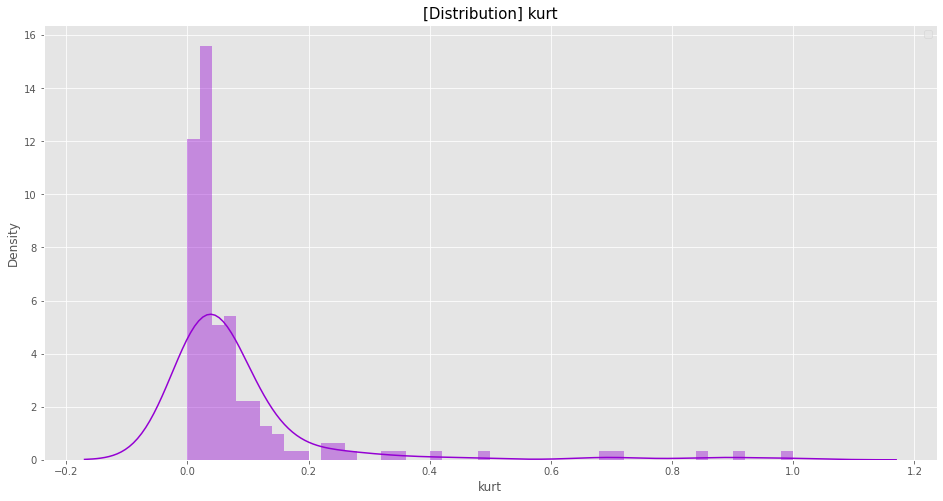

In [70]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("[Distribution] kurt", fontsize = 15)
sns.distplot(pd_pre_voice_data['kurt'] , color="darkviolet")
#sns.distplot(pd_voice_feature['meanfreq'][pd_voice_feature['label']==0] , color="red", label="Female")
plt.legend()

/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/piai/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


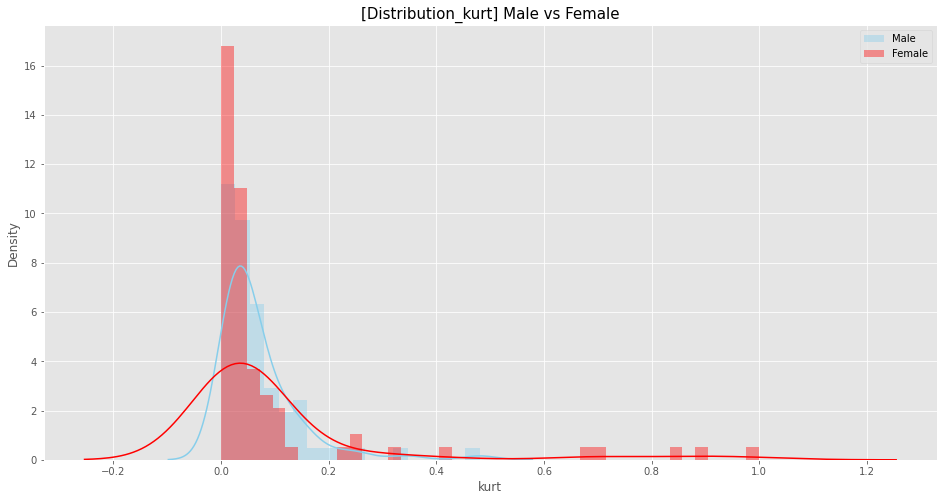

In [71]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("[Distribution_kurt] Male vs Female", fontsize = 15)
sns.distplot( pd_pre_voice_data['kurt'][pd_pre_voice_data['numerical_label']==1] , color="skyblue", label="Male")
sns.distplot( pd_pre_voice_data['kurt'][pd_pre_voice_data['numerical_label']==0] , color="red", label="Female")
plt.legend()

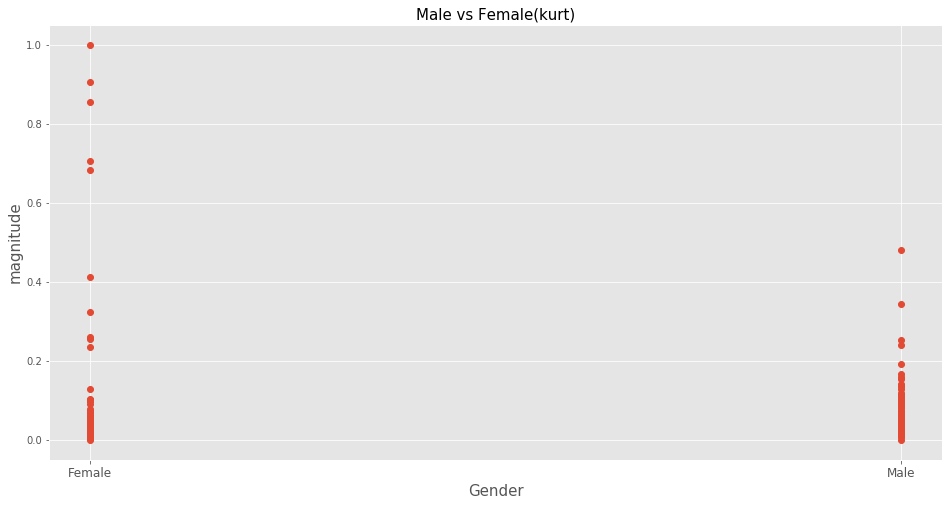

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.title("Male vs Female(kurt)", fontsize = 15)
plt.plot(pd_pre_voice_data['numerical_label'], pd_pre_voice_data['kurt'], 'o')
plt.xlabel("Gender", fontsize = 15)
plt.ylabel("magnitude", fontsize = 15)
plt.xticks([0,1], ['Female', 'Male'],fontsize=12)
plt.show()

# Split_Train/Test

In [ ]:
'''
전체 data중
70% : Train data 학습   epoch가 증가될 수록 loss가 줄어들며 overfitting 됨
10% : Validation data   epoch가 증가 될 수록 loss가 줄어들다가 다시 loss가 늘어나는 지점이 생김
                        잘 학습되었는지 중간중간에 validation (데이터가 적을 경우에는 생략)
20% : Test data
'''

In [72]:
from sklearn.model_selection import train_test_split

In [171]:
'''
x_train, x_test, y_train, y_test
test_size = 20%
random_state = random 값을 주는 seed
'''
x_train, x_test, y_train, y_test = train_test_split(pre_voice_feature, RemoveOutlier_voice_y, test_size=0.2, random_state=1) 

In [172]:
print("Number of train data: {}".format(y_train.shape[0]))
print("Number of test data: {}".format(y_test.shape[0]))

Number of train data: 125
Number of test data: 32


- **check**

In [173]:
y_test

120    0
78     1
54     1
34     1
38     1
43     1
17     1
112    0
56     1
150    0
154    0
81     0
95     0
93     0
92     0
8      1
126    0
19     1
22     1
32     1
59     1
153    0
146    0
102    0
96     0
72     1
97     0
45     1
125    0
47     1
108    0
141    0
Name: numerical_label, dtype: int8

# Classification_Algorithm

In [174]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

## Perceptron

In [175]:
from sklearn.linear_model import Perceptron

- **Perceptron을 사용하여 train 데이터 학습 및 test 데이터를 예측하시오**

In [176]:
#Perceptron Train(fit)
Per = Perceptron(tol = 1e-3)
Per.fit(x_train, y_train) #학습

# Perceptron에 test 데이터 사용하여 predict 했을 떄의 값
per_y_pred = Per.predict(x_test)
print("Predicted label : {}".format(per_y_pred))

# Test data를 이용하여 accuracy 소수점 1의 자리까지 반올림(np.round)하여 출력
per_acc = Per.score(x_test, y_test)
print("Accuracy Score : {}%".format(np.round(per_acc*100,1)))

Predicted label : [0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0]
Accuracy Score : 96.9%


- **confusion matrix**

In [177]:
per_cm = confusion_matrix(y_test, per_y_pred) # param (y_True, y_Pred)
print('confusion matrix \n', per_cm)

confusion matrix 
 [[17  0]
 [ 1 14]]


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual:0(Female)'), Text(0, 1.5, 'Actual:1(Male)')])

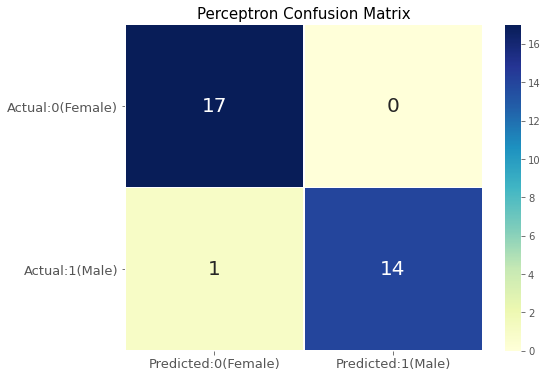

In [178]:
conf_matrix=pd.DataFrame(per_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('Perceptron Confusion Matrix', fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual:0(Female)'), Text(0, 1.5, 'Actual:1(Male)')])

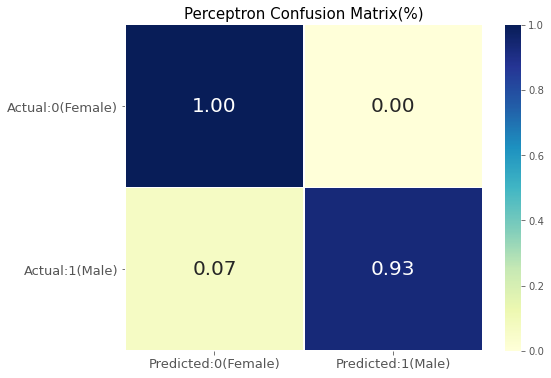

In [179]:
per_cm = per_cm.astype('float') / per_cm.sum(axis=1)[:, np.newaxis]
conf_matrix=pd.DataFrame(per_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('Perceptron Confusion Matrix(%)', fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='.2f',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

## SVM(Support Vector Machine) 

In [180]:
from sklearn.svm import SVC

- **SVM을 사용하여 train 데이터 학습 및 test 데이터를 예측하시오**

In [ ]:
# SVC = Support Vector Classification

In [181]:
#Perceptron Train(fit)
SVM = SVC()
SVM.fit(x_train, y_train) #학습

# SVM에 test 데이터 사용하여 predict 했을 떄의 값
svm_y_pred = SVM.predict(x_test)
print("Predicted label : {}".format(svm_y_pred))

# Test data를 이용하여 accuracy 소수점 1의 자리까지 반올림(np.round)하여 출력
svm_acc = SVM.score(x_test, y_test)
print("Accuracy Score : {}%".format(np.round(svm_acc*100,1)))

Predicted label : [0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0]
Accuracy Score : 90.6%


- **confusion matrix**

In [182]:
svm_cm = confusion_matrix(y_test, svm_y_pred)
print('confusion matrix \n', svm_cm)

confusion matrix 
 [[16  1]
 [ 2 13]]


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual:0(Female)'), Text(0, 1.5, 'Actual:1(Male)')])

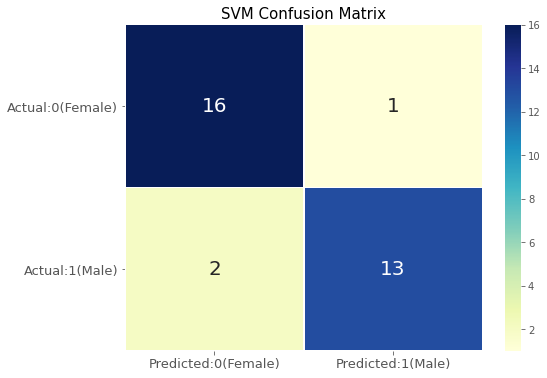

In [183]:
conf_matrix=pd.DataFrame(svm_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('SVM Confusion Matrix', fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual:0(Female)'), Text(0, 1.5, 'Actual:1(Male)')])

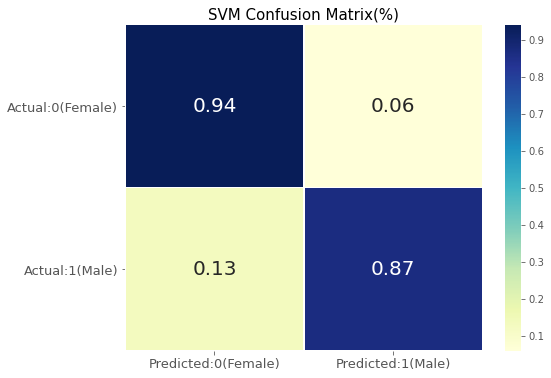

In [184]:
svm_cm = svm_cm.astype('float') / svm_cm.sum(axis=1)[:, np.newaxis]
conf_matrix=pd.DataFrame(svm_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('SVM Confusion Matrix(%)', fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='.2f',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

## Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

- **Logistic Regression을 사용하여 train 데이터 학습 및 test 데이터를 예측하시오**

In [185]:
#Logistic Regression Train(fit)
LogR = LogisticRegression()
LogR.fit(x_train, y_train) #학습

# Logistic Regression에 test 데이터 사용하여 predict 했을 떄의 값
logR_y_pred = LogR.predict(x_test)
print("Predicted label : {}".format(logR_y_pred))

# Test data를 이용하여 accuracy 소수점 1의 자리까지 반올림(np.round)하여 출력
logR_acc = LogR.score(x_test, y_test)
print("Accuracy Score : {}%".format(np.round(logR_acc*100,1)))

Predicted label : [0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0]
Accuracy Score : 96.9%


- **confusion matrix**

In [186]:
logR_cm = confusion_matrix(y_test, logR_y_pred)
print('confusion matrix \n', logR_cm)

confusion matrix 
 [[17  0]
 [ 1 14]]


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual:0(Female)'), Text(0, 1.5, 'Actual:1(Male)')])

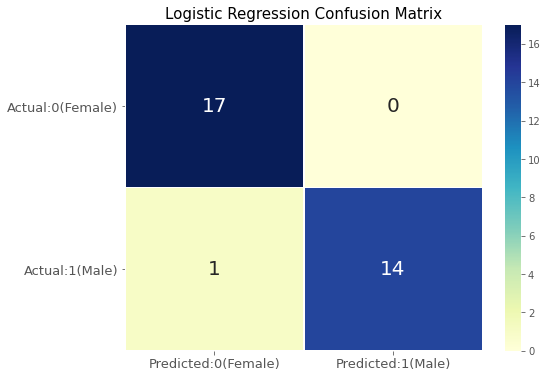

In [187]:
conf_matrix=pd.DataFrame(logR_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('Logistic Regression Confusion Matrix', fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual:0(Female)'), Text(0, 1.5, 'Actual:1(Male)')])

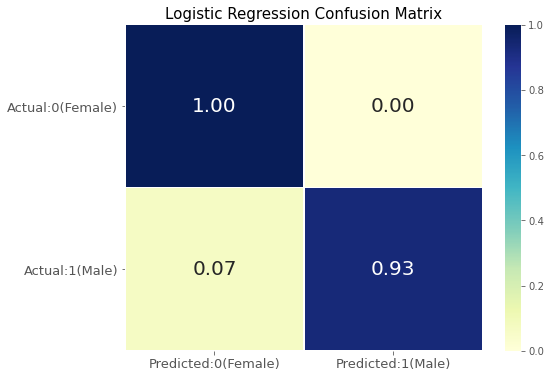

In [188]:
logR_cm = logR_cm.astype('float') / logR_cm.sum(axis=1)[:, np.newaxis]
conf_matrix=pd.DataFrame(logR_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('Logistic Regression Confusion Matrix', fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='.2f',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

## Results : Perceptron vs SVM vs Logistic Regression

- **Best performance : perceptron & logistic regression**
- **Worst performance : SVM**

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual:0(Female)'), Text(0, 1.5, 'Actual:1(Male)')])

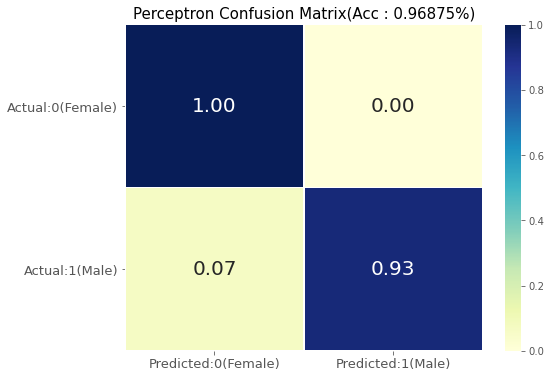

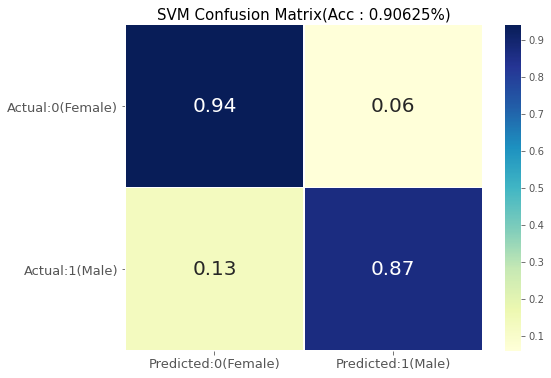

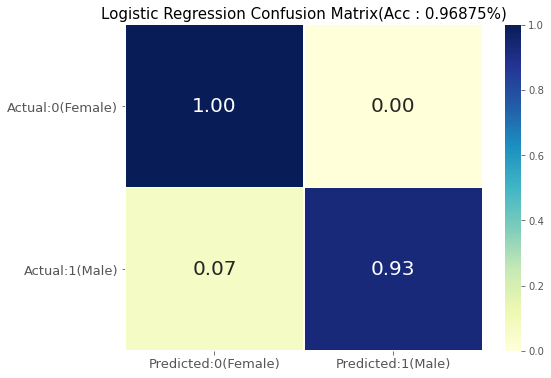

In [189]:
conf_matrix=pd.DataFrame(per_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('Perceptron Confusion Matrix(Acc : {}%)'.format(per_acc), fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='.2f',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

conf_matrix=pd.DataFrame(svm_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('SVM Confusion Matrix(Acc : {}%)'.format(svm_acc), fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='.2f',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

conf_matrix=pd.DataFrame(logR_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('Logistic Regression Confusion Matrix(Acc : {}%)'.format(logR_acc), fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='.2f',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

# Tuning_Hyperparameters

- **Applying gridsearch to SVM with worst performance**

In [190]:
from sklearn.model_selection import GridSearchCV
import sklearn

- **Metric**

In [191]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

- **Hyperparameters**

In [194]:
# 10 x 8 x 4 가지의 경우를 돌려서 최적의 parameter를 찾아봄

tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'tol': [0.0001,0.0005,0.001,0.005,0.01,0.05, 0.1, 0.5], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

- **Tuning hyperparameters**

In [195]:
'''
cv = cross validation / training data와 test data를 섞어가면서 학습

cv = 2 
2분할 해서 전자는 train으로 쓰고 남은것은 test로 쓰임
다시 후자는 train으로 쓰고 남은 것은 test로 쓰임

if cv = 4
4등분해서 train과 test를 번갈아가면서 사용
train, train, train, test
train, train, test, train
train, test, train, train
test, train, train, train
결과를 평균으로 계산해서 찾음
'''

svm_hyper = SVC()
svm_hyper_model = GridSearchCV(svm_hyper, param_grid = tuned_parameters, cv = 2, scoring='accuracy')

In [199]:
svm_hyper_model.fit(pre_voice_feature, RemoveOutlier_voice_y)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1,
                                 0.5]},
             scoring='accuracy')

In [200]:
svm_hyper_model.cv_results_["params"]

[{'C': 0.1, 'kernel': 'linear', 'tol': 0.0001},
 {'C': 0.1, 'kernel': 'linear', 'tol': 0.0005},
 {'C': 0.1, 'kernel': 'linear', 'tol': 0.001},
 {'C': 0.1, 'kernel': 'linear', 'tol': 0.005},
 {'C': 0.1, 'kernel': 'linear', 'tol': 0.01},
 {'C': 0.1, 'kernel': 'linear', 'tol': 0.05},
 {'C': 0.1, 'kernel': 'linear', 'tol': 0.1},
 {'C': 0.1, 'kernel': 'linear', 'tol': 0.5},
 {'C': 0.1, 'kernel': 'poly', 'tol': 0.0001},
 {'C': 0.1, 'kernel': 'poly', 'tol': 0.0005},
 {'C': 0.1, 'kernel': 'poly', 'tol': 0.001},
 {'C': 0.1, 'kernel': 'poly', 'tol': 0.005},
 {'C': 0.1, 'kernel': 'poly', 'tol': 0.01},
 {'C': 0.1, 'kernel': 'poly', 'tol': 0.05},
 {'C': 0.1, 'kernel': 'poly', 'tol': 0.1},
 {'C': 0.1, 'kernel': 'poly', 'tol': 0.5},
 {'C': 0.1, 'kernel': 'rbf', 'tol': 0.0001},
 {'C': 0.1, 'kernel': 'rbf', 'tol': 0.0005},
 {'C': 0.1, 'kernel': 'rbf', 'tol': 0.001},
 {'C': 0.1, 'kernel': 'rbf', 'tol': 0.005},
 {'C': 0.1, 'kernel': 'rbf', 'tol': 0.01},
 {'C': 0.1, 'kernel': 'rbf', 'tol': 0.05},
 {'C': 0

- **Optimal hyperparameters**

In [201]:
print(svm_hyper_model.best_params_)

{'C': 0.4, 'kernel': 'poly', 'tol': 0.5}


In [ ]:
# SVM = SVC(kernel = 'rbf', tol = 0.5, C = 0.8)

## SVM(Support Vector Machine) : Optimal hyperparameters

In [67]:
from sklearn.svm import SVC

- **최적의 hyper-parameters로 SVM을 학습하여 training 데이터 학습 뒤 test 데이터를 예측하시오**

In [202]:
#Perceptron Train(fit)
SVM = SVC(C=0.4, kernel='poly', tol=0.5)
SVM.fit(x_train, y_train) #학습

# SVM에 test 데이터 사용하여 predict 했을 떄의 값
svm_y_pred = SVM.predict(x_test)
print("Predicted label : {}".format(svm_y_pred))

# Test data를 이용하여 accuracy 소수점 1의 자리까지 반올림(np.round)하여 출력
svm_acc = SVM.score(x_test, y_test)
print("Accuracy Score : {}%".format(np.round(svm_acc*100,1)))

Predicted label : [0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0]
Accuracy Score : 93.8%


- **confusion matrix**

In [203]:
svm_cm = confusion_matrix(y_test, svm_y_pred)
print('confusion matrix \n', svm_cm)

confusion matrix 
 [[16  1]
 [ 1 14]]


(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual:0(Female)'), Text(0, 1.5, 'Actual:1(Male)')])

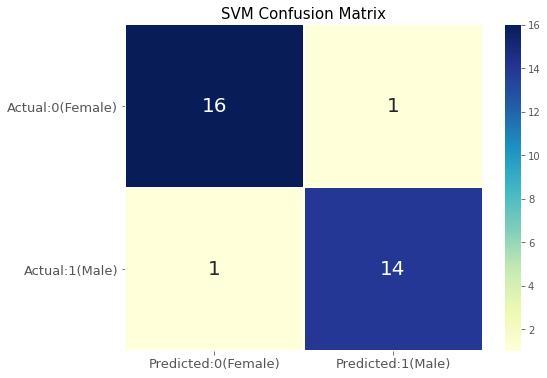

In [204]:
conf_matrix=pd.DataFrame(svm_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('SVM Confusion Matrix', fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

(array([0.5, 1.5]),
 [Text(0, 0.5, 'Actual:0(Female)'), Text(0, 1.5, 'Actual:1(Male)')])

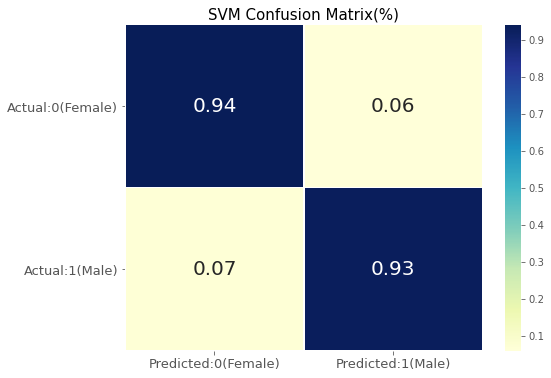

In [205]:
svm_cm = svm_cm.astype('float') / svm_cm.sum(axis=1)[:, np.newaxis]
conf_matrix=pd.DataFrame(svm_cm,columns=['Predicted:0(Female)','Predicted:1(Male)'],index=['Actual:0(Female)','Actual:1(Male)'])
plt.figure(figsize = (8,6))
plt.title('SVM Confusion Matrix(%)', fontsize = 15)
sns.heatmap(conf_matrix, annot=True, fmt='.2f',cmap="YlGnBu",annot_kws={"size": 20}, linewidths=.5)
plt.xticks(size=13)
plt.yticks(size=13, rotation=0)

- **Existing accuracy 90.6% -> optimal hyperparameters accuracy 93.8%**

# Python Function

- 위의 confusion matrix를 function화 하여 plot 하시오.

In [ ]:
#draw_confusion(x_test) 함수 만들기

def draw_confusion(svm_cm, name):
    return